In [0]:
%run ./includes/utilities

In [0]:
# Removing all the warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
dbutils.fs.rm(projectPath, recurse=True)

Out[160]: True

In [0]:
process_file("health_profile_data.snappy.parquet", silverDailyPath, "health_profile_data")
process_file("user_profile_data.snappy.parquet", dimUserPath, "user_profile_data")

Retrieve health_profile_data.snappy.parquet.
Load health_profile_data.snappy.parquet to /dbacademy/nvkanirudh/mlmodels/profile/daily/
Register health_profile_data using path: /dbacademy/nvkanirudh/mlmodels/profile/daily/
Retrieve user_profile_data.snappy.parquet.
Load user_profile_data.snappy.parquet to /dbacademy/nvkanirudh/mlmodels/profile/users/
Register user_profile_data using path: /dbacademy/nvkanirudh/mlmodels/profile/users/


In [0]:
%run ./includes/configuration

In [0]:
user_profile_df = spark.read.table("user_profile_data")
health_profile_df = spark.read.table("health_profile_data")

Pandas dataframe loads the data into the memory whereas the spark dataframe is a reference to where the data is in the disk (lazt loading)

In [0]:
print("User Profile Data")
user_profile_df.printSchema()
print("Health Profile Data")
health_profile_df.printSchema()

User Profile Data
root
 |-- _id: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- lifestyle: string (nullable = true)
 |-- female: boolean (nullable = true)
 |-- country: string (nullable = true)
 |-- occupation: string (nullable = true)

Health Profile Data
root
 |-- dte: timestamp (nullable = true)
 |-- _id: string (nullable = true)
 |-- resting_heartrate: double (nullable = true)
 |-- active_heartrate: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- VO2_max: double (nullable = true)
 |-- workout_minutes: double (nullable = true)



In [0]:
user_profile_df.count()

Out[167]: 3000

In [0]:
from pyspark.sql.functions import min, max

display(health_profile_df.select(min("dte"), max("dte")))

min(dte),max(dte)
2019-01-01T00:00:00.000+0000,2019-12-31T00:00:00.000+0000


In [0]:
display(user_profile_df.select("lifestyle").distinct())

lifestyle
sedentary
weight trainer
cardio trainer


In [0]:
user_profile_sample_df = user_profile_df.sample(0.03)

display(user_profile_sample_df.groupby("lifestyle").count())

lifestyle,count
sedentary,23
weight trainer,29
cardio trainer,33


In [0]:
health_profile_sample_df = (user_profile_sample_df.join(health_profile_df, "_id"))

assert 365*user_profile_sample_df.count() == health_profile_sample_df.count()

In [0]:
display(health_profile_sample_df)

_id,first_name,last_name,lifestyle,female,country,occupation,dte,resting_heartrate,active_heartrate,BMI,VO2_max,workout_minutes
d28e4512-e48a-11ea-8204-0242ac110002,Lisa,Randall,weight trainer,true,USA,Exec-managerial,2019-01-01T00:00:00.000+0000,52.88520137383073,131.91548483407905,22.415290914979,35.946740619533905,10.379792376306762
d28e4512-e48a-11ea-8204-0242ac110002,Lisa,Randall,weight trainer,true,USA,Exec-managerial,2019-01-02T00:00:00.000+0000,37.347237809768615,122.662958509239,23.477067901556392,36.8978630878886,15.863092046026901
d28e4512-e48a-11ea-8204-0242ac110002,Lisa,Randall,weight trainer,true,USA,Exec-managerial,2019-01-03T00:00:00.000+0000,49.915543119982104,113.50286601321817,22.76511097346402,35.93617837857853,15.623347510449328
d28e4512-e48a-11ea-8204-0242ac110002,Lisa,Randall,weight trainer,true,USA,Exec-managerial,2019-01-04T00:00:00.000+0000,54.27776364501059,127.78697897578353,24.131364509852386,36.007140925267436,28.537205145593983
d28e4512-e48a-11ea-8204-0242ac110002,Lisa,Randall,weight trainer,true,USA,Exec-managerial,2019-01-05T00:00:00.000+0000,56.005385409204294,122.28435970842156,20.958355052580647,36.3436884200141,25.386820319081146
d28e4512-e48a-11ea-8204-0242ac110002,Lisa,Randall,weight trainer,true,USA,Exec-managerial,2019-01-06T00:00:00.000+0000,56.392410563948964,111.7263248952101,21.77034363313761,35.8628055331042,16.685373648060235
d28e4512-e48a-11ea-8204-0242ac110002,Lisa,Randall,weight trainer,true,USA,Exec-managerial,2019-01-07T00:00:00.000+0000,61.226642691670456,131.66102691110052,23.910359732724146,36.35148051571739,10.551941076568532
d28e4512-e48a-11ea-8204-0242ac110002,Lisa,Randall,weight trainer,true,USA,Exec-managerial,2019-01-08T00:00:00.000+0000,60.76100605542071,125.96600974733681,21.27056734663443,36.28748333258283,9.585413195590986
d28e4512-e48a-11ea-8204-0242ac110002,Lisa,Randall,weight trainer,true,USA,Exec-managerial,2019-01-09T00:00:00.000+0000,52.994076814781245,124.3975272213355,23.558624189159456,36.90191736530702,8.838013829223307
d28e4512-e48a-11ea-8204-0242ac110002,Lisa,Randall,weight trainer,true,USA,Exec-managerial,2019-01-10T00:00:00.000+0000,63.94990550091276,129.14787347882546,20.970875563618474,36.57587907881782,28.963443896924765


In [0]:
from pyspark.sql.functions import mean, col

health_tracker_sample_agg_df = (
    health_profile_sample_data.groupby("_id", "lifestyle").agg(
        mean(col("BMI")).alias("mean_BMI"),
        mean(col("active_heartrate")).alias("mean_active_heartrate"),
        mean(col("resting_heartrate")).alias("mean_resting_heartrate"),
        mean(col("VO2_max")).alias("mean_VO2_max")
    )
)

In [0]:
display(health_tracker_sample_agg_df)

_id,lifestyle,mean_BMI,mean_active_heartrate,mean_resting_heartrate,mean_VO2_max
d3bc8796-e48a-11ea-8204-0242ac110002,weight trainer,16.180741978834508,109.85499426322706,51.535181965006,38.04206071131605
e3ec9282-e48a-11ea-8204-0242ac110002,cardio trainer,23.919694756228306,98.98494239586718,48.53453721163912,43.153287072249604
d792b516-e48a-11ea-8204-0242ac110002,weight trainer,28.31498955731862,117.11845607220734,59.30476906386263,34.010498837162174
dabfe6dc-e48a-11ea-8204-0242ac110002,weight trainer,24.68550647712127,114.99976827289649,59.6580331118628,32.64200851944224
d85c57ea-e48a-11ea-8204-0242ac110002,weight trainer,16.179799115801973,110.86456013040053,49.707665712666284,41.466420744556125
dbba22f0-e48a-11ea-8204-0242ac110002,weight trainer,23.00539344580523,120.56696271876777,57.484015311095156,35.789482694763244
e0056630-e48a-11ea-8204-0242ac110002,weight trainer,23.65766417052111,110.54950900949781,60.53405407327022,33.98935231205849
fe5450ba-e48a-11ea-8204-0242ac110002,sedentary,22.833675508928557,147.4744513553703,78.44060045163558,21.86774227998946
ed6bb22a-e48a-11ea-8204-0242ac110002,cardio trainer,18.649112852990008,113.01951479277085,51.3501998785211,36.571268067572376
da203542-e48a-11ea-8204-0242ac110002,weight trainer,27.83546999486806,122.13645927078953,62.764533830466476,30.325514967745473


The below step is not really important because, I am loading the data into delta table so that the data can be read in other notebooks. Since I am working in a single notebook, this is not really required.

In [0]:
(
  health_tracker_sample_agg_df.write
  .format("delta")
  .mode("overwrite")
  .save(goldPath + "health_tracker_sample_agg")
)

In [0]:
display(dbutils.fs.ls(goldPath + "health_tracker_sample_agg"))

path,name,size,modificationTime
dbfs:/dbacademy/nvkanirudh/mlmodels/profile/gold/health_tracker_sample_agg/_delta_log/,_delta_log/,0,0
dbfs:/dbacademy/nvkanirudh/mlmodels/profile/gold/health_tracker_sample_agg/part-00000-fdd1f730-771b-4606-be68-7907805edbfa-c000.snappy.parquet,part-00000-fdd1f730-771b-4606-be68-7907805edbfa-c000.snappy.parquet,5548,1680079490000


In [0]:
health_tracker_sample_agg_pandas_df = health_tracker_sample_agg_df.toPandas()

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
lifestyles = health_tracker_sample_agg_pandas_df["lifestyle"].unique()
lifestyles

Out[179]: array(['weight trainer', 'cardio trainer', 'sedentary'], dtype=object)

In [0]:
health_tracker_sample_agg_pandas_df.dtypes

Out[180]: _id                        object
lifestyle                  object
mean_BMI                  float64
mean_active_heartrate     float64
mean_resting_heartrate    float64
mean_VO2_max              float64
dtype: object

In [0]:
features = health_tracker_sample_agg_pandas_df.select_dtypes(exclude=["object"])
target = health_tracker_sample_agg_pandas_df[["lifestyle"]].copy()

Out[182]: <seaborn.axisgrid.PairGrid at 0x7f147e4e00d0>

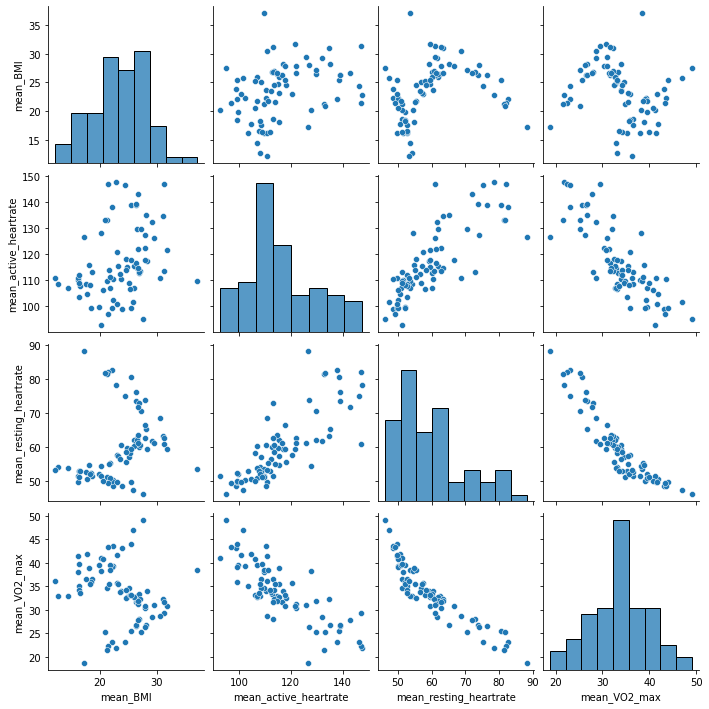

In [0]:
sns.pairplot(features)

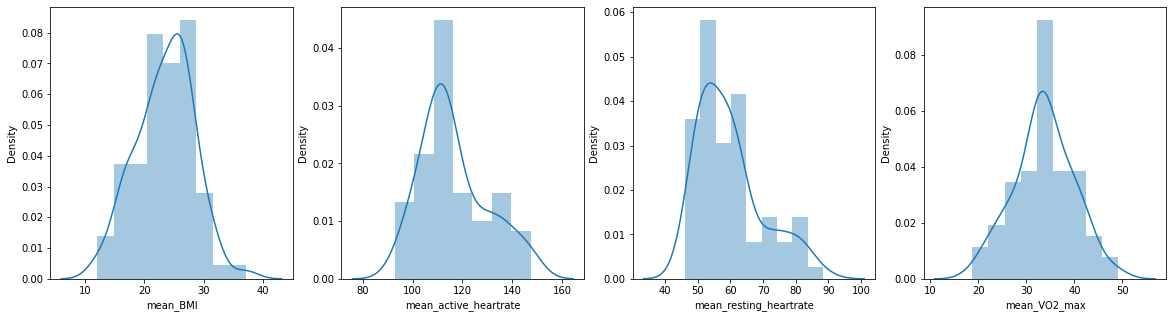

In [0]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

for i, feature in enumerate(features):
    sns.distplot(features[feature], ax=ax[i])

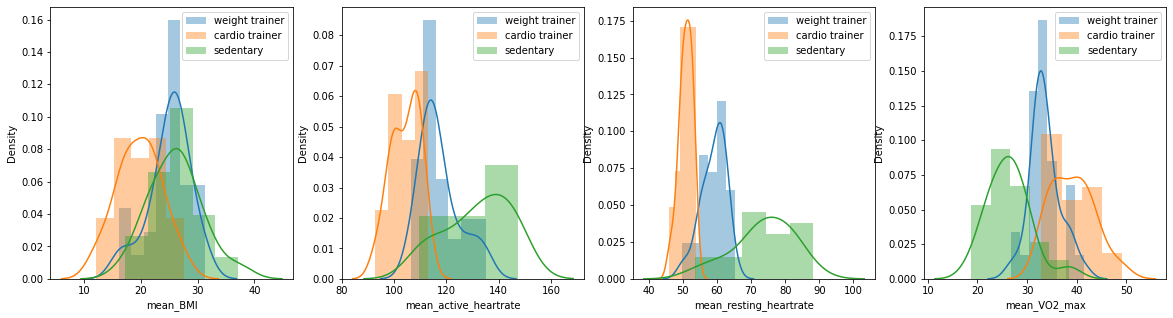

In [0]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

for i, feature in enumerate(features):
    for lifestyle in lifestyles:
        subset = features[target["lifestyle"] == lifestyle]
        sns.distplot(subset[feature], ax=ax[i], label=lifestyle)
    ax[i].legend()

Out[185]: <AxesSubplot:>

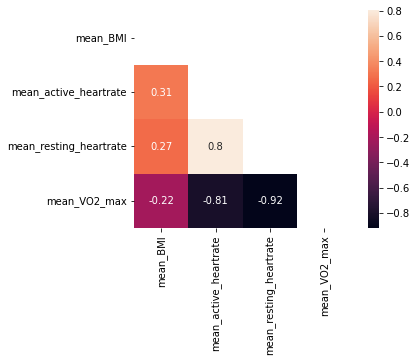

In [0]:
corr = features.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
sns.heatmap(corr, mask=mask, square=True, annot=True)

In [0]:
from sklearn.manifold import TSNE

np.random.seed(10)
tsne = TSNE(n_components=2)

features_in_2d = tsne.fit_transform(features)
features_in_2d = pd.DataFrame(features_in_2d)

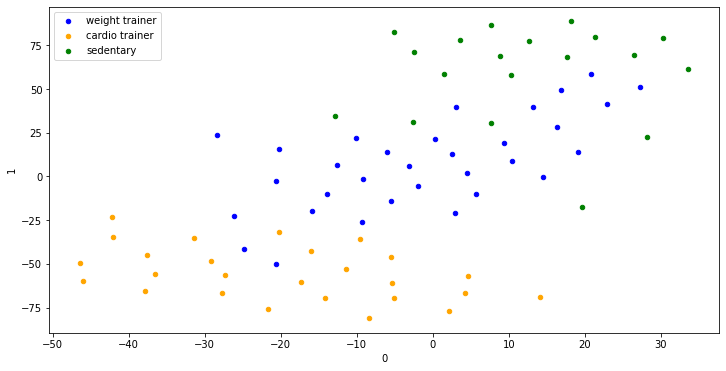

In [0]:
colors = ("blue", "orange", "green")
fig, ax = plt.subplots(1,1,figsize=(12,6))

for color, lifestyle in zip(colors, lifestyles):
    two_dim_per_lifestyle = features_in_2d[target.lifestyle == lifestyle]
    two_dim_per_lifestyle.plot(x=0, y=1, kind="scatter", c=color, label=lifestyle, ax=ax)

In [0]:
%run ./includes/preprocessing

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target["lifestyle_encoded"] = le.fit_transform(target["lifestyle"])

In [0]:
target

,lifestyle,lifestyle_encoded
0,weight trainer,2
1,cardio trainer,0
2,weight trainer,2
3,weight trainer,2
4,weight trainer,2
...,...,...
72,weight trainer,2
73,cardio trainer,0
74,cardio trainer,0
75,weight trainer,2


In [0]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(features_in_2d, target.lifestyle_encoded)

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty="none")

lr.fit(trainX, trainY)
lr.score(testX, testY)

Out[199]: 0.8

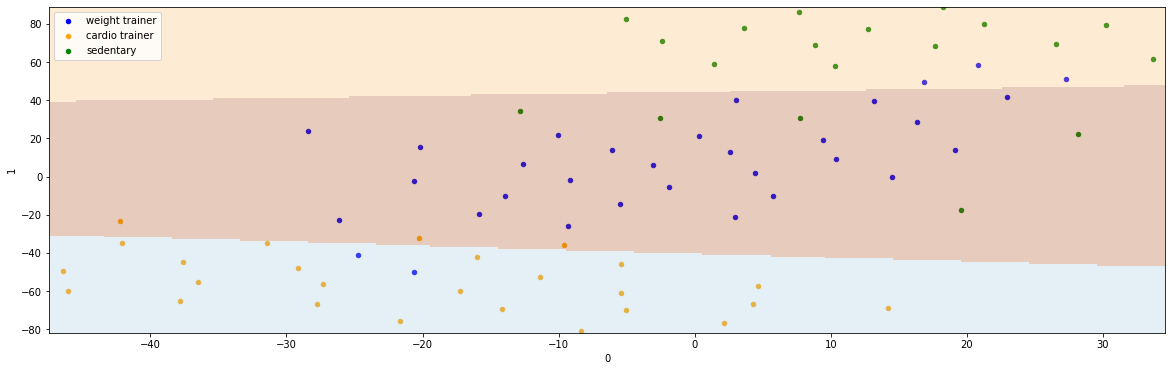

In [0]:
fig, ax = plt.subplots(figsize=(20, 6))

scatter_plot_with_decision_boundary(ax, features_in_2d, target, lr)

In [0]:
(features_train, features_test, target_train, target_test) = train_test_split(features, target.lifestyle_encoded)

In [0]:
lr.fit(features_train, target_train)
lr.score(features_test, target_test)

Out[202]: 0.85

In [0]:
lr = LogisticRegression(penalty="none", max_iter=1e4)
lr.fit(features_train, target_train)
lr.score(features_test, target_test)

Out[203]: 0.85

In [0]:
def generate_bootstrap_sample():
    df = health_tracker_sample_agg_pandas_df
    sample_df_list = []
    for lifestyle in lifestyles:
        sample_df_list.append(df[df.lifestyle == lifestyle].sample(5))
    return pd.concat(sample_df_list)

In [0]:
generate_bootstrap_sample()

,_id,lifestyle,mean_BMI,mean_active_heartrate,mean_resting_heartrate,mean_VO2_max
15,dea2f8de-e48a-11ea-8204-0242ac110002,weight trainer,29.214987,132.157592,61.616008,28.552009
23,da2959a6-e48a-11ea-8204-0242ac110002,weight trainer,25.161228,108.685095,56.965411,34.693929
16,e0ffee3e-e48a-11ea-8204-0242ac110002,weight trainer,24.620312,118.144125,55.413976,32.535373
75,d70c2578-e48a-11ea-8204-0242ac110002,weight trainer,21.554190,113.790856,54.965041,35.401314
72,da70b198-e48a-11ea-8204-0242ac110002,weight trainer,31.247262,113.268421,62.738176,31.632650
58,ed1ac338-e48a-11ea-8204-0242ac110002,cardio trainer,20.450721,106.226207,49.907621,40.718965
68,ece85344-e48a-11ea-8204-0242ac110002,cardio trainer,16.382862,108.972544,51.127168,39.818119
74,e455cd6a-e48a-11ea-8204-0242ac110002,cardio trainer,12.111437,110.761859,53.223497,36.213071
56,ea1fa090-e48a-11ea-8204-0242ac110002,cardio trainer,17.516643,108.542256,52.572698,36.597191
63,e91e4ffc-e48a-11ea-8204-0242ac110002,cardio trainer,16.524920,107.838176,52.773630,33.553041


In [0]:
subsample_sets = [generate_bootstrap_sample() for _ in range(10)]

In [0]:
[len(s) for s in subsample_sets]

Out[207]: [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

In [0]:
le.fit_transform(health_tracker_sample_agg_pandas_df["lifestyle"])\

for sample_set in subsample_sets:
    sample_set["lifestyle_encoded"] = le.transform(sample_set["lifestyle"])

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [0]:
feature_subset = ["mean_active_heartrate"]
experimental_data_subsets = [sample_set[feature_subset] for sample_set in subsample_sets]

targets = [sample_set["lifestyle_encoded"] for sample_set in subsample_sets]

In [0]:
experimental_scores = []
for features, target in zip(experimental_data_subsets, targets):
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid={}, cv=5)
    grid_search.fit(features, target)
    score = grid_search.cv_results_["mean_test_score"][0]
    experimental_scores.append(score)

In [0]:
experimental_scores

Out[212]: [0.8,
 0.6666666666666666,
 0.8666666666666668,
 0.5999999999999999,
 0.7333333333333333,
 0.7999999999999999,
 0.7333333333333333,
 0.6,
 0.8666666666666666,
 0.4]

In [0]:
pd.DataFrame(grid_search.cv_results_).T

,0
mean_fit_time,0.003109
std_fit_time,0.000681
mean_score_time,0.003054
std_score_time,0.000179
params,{}
split0_test_score,0.333333
split1_test_score,0.333333
split2_test_score,0.0
split3_test_score,0.666667
split4_test_score,0.666667


In [0]:
print(feature_subset)
print("Mean Score:", np.mean(experimental_scores))
print("Standard Deviation Score:", np.std(experimental_scores))


['mean_active_heartrate']
Mean Score: 0.7066666666666667
Standard Deviation Score: 0.13727506854649335


In [0]:
import mlflow
from sklearn.linear_model import LogisticRegression

def experiment_runner(feature_subset):
#   Helper function to run MLflow experiment on a feature subset.
  with mlflow.start_run() as run:
    "Build Subsets of Features."
    experimental_data_subsets = [
        sample_set[feature_subset]
        for sample_set in subsample_sets
    ]

    targets = [
      sample_set["lifestyle_encoded"]
      for sample_set in subsample_sets
    ]

    "Fit on each subset using Cross-Validation."
    experimental_scores = []
    for features, target in zip(experimental_data_subsets, targets):
      grid_search = GridSearchCV(LogisticRegression(penalty='none', max_iter=10000), param_grid={}, cv=5)
      grid_search.fit(features, target)
      score = grid_search.cv_results_["mean_test_score"][0]
      experimental_scores.append(score)

    "Record experiment results."
    mlflow.log_param("subset", feature_subset)
    mlflow.log_metric("mean score", np.mean(experimental_scores))
    mlflow.log_metric("std score", np.std(experimental_scores))

In [0]:
experiment_runner(["mean_active_heartrate"])

In [0]:
from itertools import combinations

feature_subsets = []
feature_columns = health_tracker_sample_agg_pandas_df.select_dtypes(exclude=["object"]).columns

for i in range(1, len(feature_columns)+1):
    feature_subsets += [list(feature) for feature in combinations(feature_columns, i)]

feature_subsets

Out[217]: [['mean_BMI'],
 ['mean_active_heartrate'],
 ['mean_resting_heartrate'],
 ['mean_VO2_max'],
 ['mean_BMI', 'mean_active_heartrate'],
 ['mean_BMI', 'mean_resting_heartrate'],
 ['mean_BMI', 'mean_VO2_max'],
 ['mean_active_heartrate', 'mean_resting_heartrate'],
 ['mean_active_heartrate', 'mean_VO2_max'],
 ['mean_resting_heartrate', 'mean_VO2_max'],
 ['mean_BMI', 'mean_active_heartrate', 'mean_resting_heartrate'],
 ['mean_BMI', 'mean_active_heartrate', 'mean_VO2_max'],
 ['mean_BMI', 'mean_resting_heartrate', 'mean_VO2_max'],
 ['mean_active_heartrate', 'mean_resting_heartrate', 'mean_VO2_max'],
 ['mean_BMI',
  'mean_active_heartrate',
  'mean_resting_heartrate',
  'mean_VO2_max']]

In [0]:
for feature_subset in feature_subsets:
    experiment_runner(feature_subset)

In [0]:
results = mlflow.search_runs()

In [0]:
results = results[['metrics.mean score', 'metrics.std score', 'params.subset']]
results = results[~results["params.subset"].isnull()]
results.drop_duplicates(inplace=True)
results

,metrics.mean score,metrics.std score,params.subset
0,0.706667,0.163843,"['mean_BMI', 'mean_active_heartrate', 'mean_re..."
1,0.726667,0.124544,"['mean_active_heartrate', 'mean_resting_heartr..."
2,0.740000,0.147422,"['mean_BMI', 'mean_resting_heartrate', 'mean_V..."
3,0.720000,0.132665,"['mean_BMI', 'mean_active_heartrate', 'mean_VO..."
4,0.640000,0.074237,"['mean_BMI', 'mean_active_heartrate', 'mean_re..."
...,...,...,...
95,0.740000,0.105198,"['mean_BMI', 'mean_active_heartrate']"
96,0.740000,0.091652,['mean_VO2_max']
97,0.873333,0.086667,['mean_resting_heartrate']
98,0.773333,0.090431,['mean_active_heartrate']


In [0]:
results["n_terms"] = results["params.subset"].apply(lambda x: x.count(",")+1)
results["metrics.mean score"] = 1 - results["metrics.mean score"]
results


,metrics.mean score,metrics.std score,params.subset,n_terms
0,0.293333,0.163843,"['mean_BMI', 'mean_active_heartrate', 'mean_re...",4
1,0.273333,0.124544,"['mean_active_heartrate', 'mean_resting_heartr...",3
2,0.260000,0.147422,"['mean_BMI', 'mean_resting_heartrate', 'mean_V...",3
3,0.280000,0.132665,"['mean_BMI', 'mean_active_heartrate', 'mean_VO...",3
4,0.360000,0.074237,"['mean_BMI', 'mean_active_heartrate', 'mean_re...",3
...,...,...,...,...
95,0.260000,0.105198,"['mean_BMI', 'mean_active_heartrate']",2
96,0.260000,0.091652,['mean_VO2_max'],1
97,0.126667,0.086667,['mean_resting_heartrate'],1
98,0.226667,0.090431,['mean_active_heartrate'],1


Out[222]: <matplotlib.legend.Legend at 0x7f144443ca30>

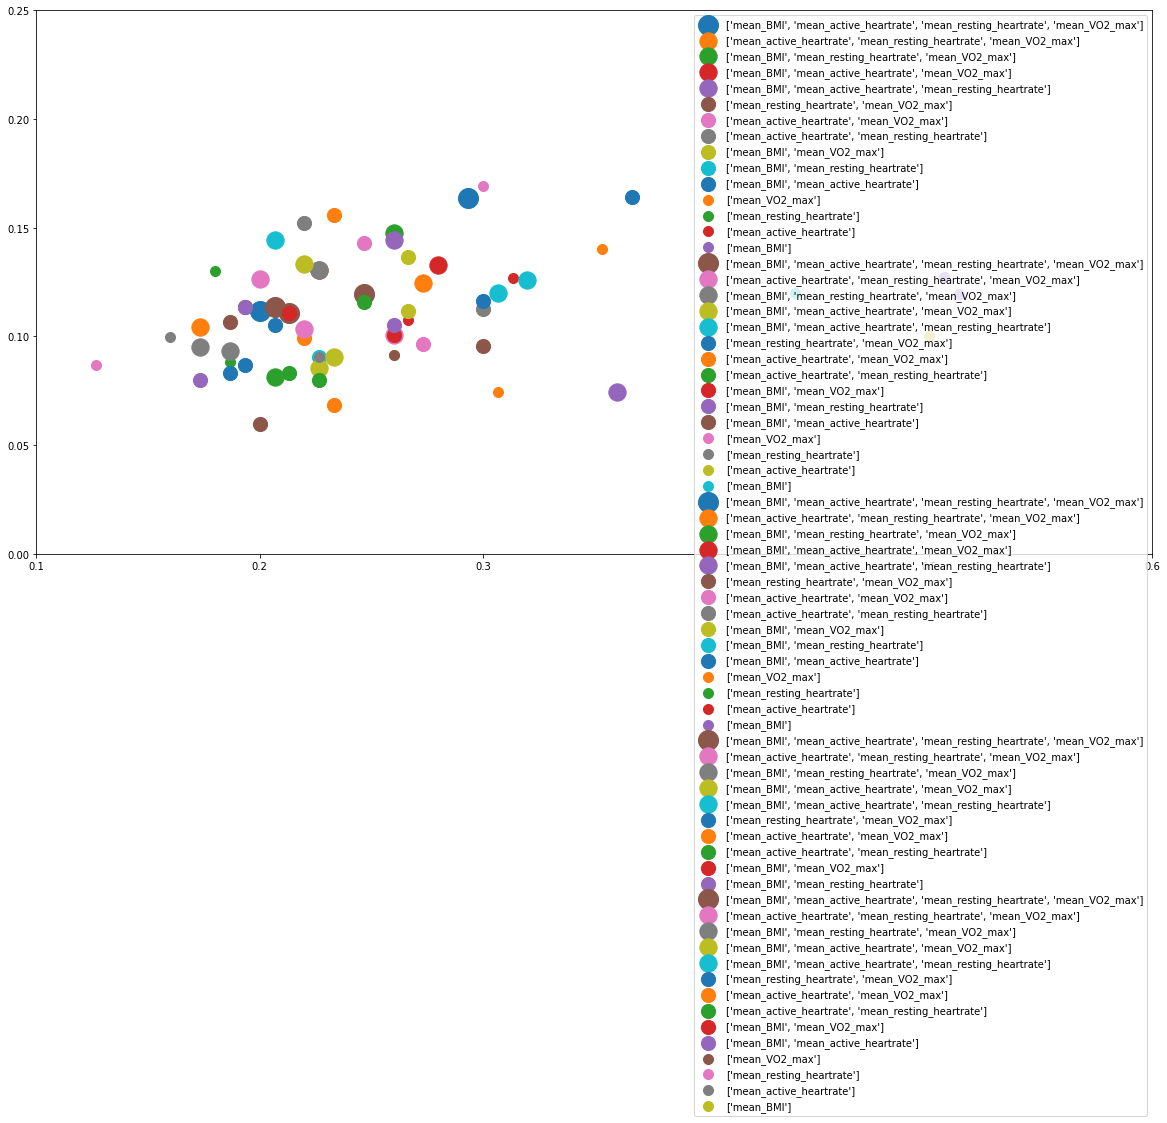

In [0]:
plt.figure(figsize=(20,10))

for _, (bias, variance, description, n_terms) in results.iterrows():
    plt.scatter(bias, variance, s=100*n_terms, label=description)
plt.xlim(0.1, 0.6)
plt.ylim(0, 0.25)
plt.legend()

In [0]:
%run ./includes/preprocessing/

In [0]:
for feature_subset in feature_subsets:
    experiment_runner(
    feature_subset=feature_subset,
    model=DecisionTreeClassifier()
    )

In [0]:
results = retrieve_results(metrics=["mean score", "std score"],
                           params=["subset"])
results

,metrics.mean score,metrics.std score,params.subset
0,0.773333,0.149666,"['mean_BMI', 'mean_active_heartrate', 'mean_re..."
1,0.773333,0.133998,"['mean_active_heartrate', 'mean_resting_heartr..."
2,0.780000,0.103494,"['mean_BMI', 'mean_resting_heartrate', 'mean_V..."
3,0.753333,0.103494,"['mean_BMI', 'mean_active_heartrate', 'mean_VO..."
4,0.753333,0.146211,"['mean_BMI', 'mean_active_heartrate', 'mean_re..."
...,...,...,...
110,0.740000,0.105198,"['mean_BMI', 'mean_active_heartrate']"
111,0.740000,0.091652,['mean_VO2_max']
112,0.873333,0.086667,['mean_resting_heartrate']
113,0.773333,0.090431,['mean_active_heartrate']


In [0]:
for feature_subset in feature_subsets:
    experiment_runner(
    feature_subset=feature_subset,
    model=LogisticRegression(penalty="none", max_iter=1e4)
    )

In [0]:
results = retrieve_results(metrics=["mean score", "std score"],
                           params=["model", "subset"])
results["bias"] = 1 - results["metrics.mean score"]
results["variance"] = results["metrics.std score"]**2
results.drop(["metrics.mean score", "metrics.std score"], axis=1, inplace=True)
results.sort_values("bias").head(10)

,params.model,params.subset,bias,variance
12,LogisticRegression,['mean_resting_heartrate'],0.160000,0.009956
86,DecisionTreeClassifier,"['mean_active_heartrate', 'mean_resting_heartr...",0.173333,0.010844
2,LogisticRegression,"['mean_BMI', 'mean_resting_heartrate', 'mean_V...",0.173333,0.009067
9,LogisticRegression,"['mean_BMI', 'mean_resting_heartrate']",0.173333,0.006400
27,DecisionTreeClassifier,['mean_resting_heartrate'],0.180000,0.016933
90,DecisionTreeClassifier,"['mean_resting_heartrate', 'mean_VO2_max']",0.186667,0.011378
8,LogisticRegression,"['mean_BMI', 'mean_VO2_max']",0.193333,0.012844
24,DecisionTreeClassifier,"['mean_BMI', 'mean_resting_heartrate']",0.193333,0.012844
5,LogisticRegression,"['mean_resting_heartrate', 'mean_VO2_max']",0.193333,0.007511
101,DecisionTreeClassifier,"['mean_active_heartrate', 'mean_resting_heartr...",0.200000,0.016000


In [0]:
results["n_terms"] = results["params.subset"].apply(lambda x: x.count(",") + 1)
results["tradeoff"] = results["bias"]**2 + results["variance"]
results.sort_values("tradeoff").head(10)


,params.model,params.subset,bias,variance,n_terms,tradeoff
12,LogisticRegression,['mean_resting_heartrate'],0.160000,0.009956,1,0.035556
9,LogisticRegression,"['mean_BMI', 'mean_resting_heartrate']",0.173333,0.006400,2,0.036444
2,LogisticRegression,"['mean_BMI', 'mean_resting_heartrate', 'mean_V...",0.173333,0.009067,3,0.039111
86,DecisionTreeClassifier,"['mean_active_heartrate', 'mean_resting_heartr...",0.173333,0.010844,3,0.040889
5,LogisticRegression,"['mean_resting_heartrate', 'mean_VO2_max']",0.193333,0.007511,2,0.044889
90,DecisionTreeClassifier,"['mean_resting_heartrate', 'mean_VO2_max']",0.186667,0.011378,2,0.046222
27,DecisionTreeClassifier,['mean_resting_heartrate'],0.180000,0.016933,1,0.049333
87,DecisionTreeClassifier,"['mean_BMI', 'mean_resting_heartrate', 'mean_V...",0.206667,0.006622,3,0.049333
8,LogisticRegression,"['mean_BMI', 'mean_VO2_max']",0.193333,0.012844,2,0.050222
24,DecisionTreeClassifier,"['mean_BMI', 'mean_resting_heartrate']",0.193333,0.012844,2,0.050222


Out[236]: <matplotlib.legend.Legend at 0x7f1448468e50>

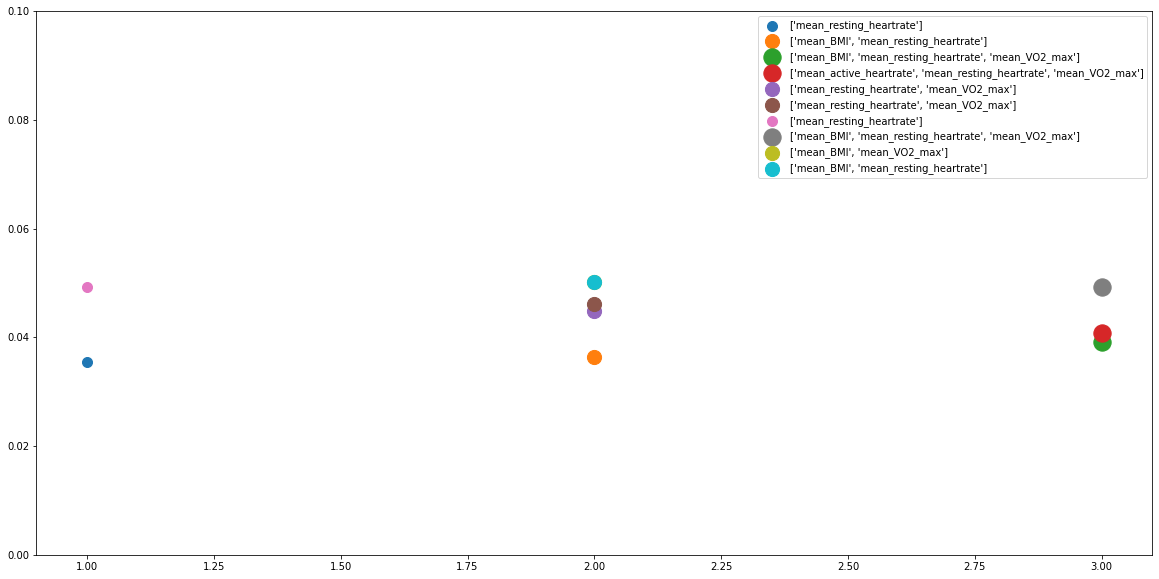

In [0]:
plt.figure(figsize=(20,10))

for _, (_, description, _, _, n_terms, tradeoff) in results.sort_values("tradeoff").head(10).iterrows():
    plt.scatter(n_terms, tradeoff, s=100*n_terms, label=description)
plt.ylim(0, 0.1)
plt.legend()
